# 感度分析の全体像

感度分析＝未観測の交絡因子の影響の評価

入力が変化したときの出力について
*   変化の方向（正負）
*   その度合い（強さ）を評価

[感度分析の全体像_医療](https://www.youtube.com/watch?v=hY-G88kA8Xo)



# 部分決定係数を用いた感度分析

# E-valueを用いた感度分析

E-value（感度分析におけるE-value）は、疫学研究や因果推論で使われる**未測定交絡（unmeasured confounding）への頑健性を評価する指標**です。特に、観察研究において因果関係の主張が**未測定交絡の影響によってどれほど揺らぎうるか**を定量的に評価するために用いられます。

---

 🔍 E-valueの定義（基本的な考え方）

E-valueとは：

> \*\*観察された効果を説明するために、交絡因子が処置とアウトカムの両方にどれだけ強く関連していなければならないかを示す、最小のリスク比（risk ratio）\*\*です。

つまり、交絡因子がなければ観察された関連は因果的かもしれないが、どれだけ強い交絡因子が存在すれば、観察された因果推定が**完全に消えてしまうのか**（＝帰無仮説と一致してしまうのか）を示すのがE-valueです。

---

 🧮 E-valueの計算方法

観察されたリスク比（RR）またはオッズ比（OR）に基づいて、E-valueを次のように計算します（RR > 1の場合）：

$$
E\text{-value} = RR + \sqrt{RR \cdot (RR - 1)}
$$

例：

* 観察されたRR = 2.0 のとき：

$$
E\text{-value} = 2.0 + \sqrt{2.0 \cdot (2.0 - 1)} = 2.0 + \sqrt{2.0} \approx 2.0 + 1.41 = 3.41
$$

つまり、交絡因子が曝露とアウトカムに対してそれぞれ**リスク比3.41以上の影響力**を持たない限り、観察された効果を完全に説明することはできない。

---

 🧠 解釈のポイント

* **E-valueが大きい** → 結果は交絡因子に対して**頑健**（robust）。
* **E-valueが小さい** → 弱い交絡因子でも結果が説明できる可能性がある → **因果関係の主張は弱くなる**。

---

 📌 使用場面

* 観察研究（コホート、症例対照など）における因果推論
* 医療・公衆衛生・社会科学でのポリシー評価
* RCTの実施が難しい領域での因果効果の正当化

---

 📚 参考文献（主要なもの）

* VanderWeele, T. J., & Ding, P. (2017). Sensitivity analysis in observational research: introducing the E-value. *Annals of Internal Medicine*, 167(4), 268–274.
* Mathur, M. B., & VanderWeele, T. J. (2020). Sensitivity analysis for unmeasured confounding. *International Journal of Epidemiology*, 49(2), 603–605.

---


Q.キャンペーンに対する未観測の交絡因子の影響はどれほどか？

*   交絡因子の影響を評価
*   施策の改善



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

#サンプルのマーケティングデータセットを作成
random.seed(0)
n = 500 #顧客数
data = {
    'CustomerID': range(1, n + 1), #顧客IDの設定
    'EmailCampaign': [random.choice([0, 1]) for _ in range(n)], #処置変数（顧客がメールを受け取った場合は1、それ以外の場合は0）
    'Purchase': [random.choice([0, 1]) for _ in range(n)] #結果変数（顧客が購入した場合は1、それ以外の場合は0）
}
#キャンペーン（T）と購入（Y）両方に未観測の交絡因子が影響

df = pd.DataFrame(data)

In [ ]:
#相対リスクRRの計算=処置群の購入割合/対照群の〃
purchase_email = df[df['EmailCampaign'] == 1]['Purchase'].mean()
purchase_control = df[df['EmailCampaign'] == 0]['Purchase'].mean()
rr_treatment_effect = purchase_email / purchase_control
rr_treatment_effect

np.float64(1.1089238845144356)

In [ ]:
e_value = rr_treatment_effect + np.sqrt(rr_treatment_effect * (rr_treatment_effect - 1))
e_value
'''
E-value=1.456->それほど大きい値でない->未観測の交絡因子の影響がある可能性
->変数を追加、A/Bテストの実施など
'''

np.float64(1.4564699924370386)

課題点

1.解釈の曖昧さへの対応：一つの交絡因子の影響が小さくても、複数あれば相乗効果で影響が大きくなる可能性

2.測定誤差のようなバイアスを考慮していない

3.非線形な効果への対応

# 機械学習を用いた感度分析

🔹オースティンプロット（Austin Plot）とは
概要
各説明変数の感度（目的変数への影響）を、説明変数の値を他の変数の影響を取り除いた上で変化させた場合に目的変数がどう変化するかで可視化する方法です。

**回帰モデルを用いた変数の「条件付き効果」**を見るもの。

特に、共変量の分布が重なっている範囲での感度を視覚的に比較できる。

プロット内容
X軸：説明変数（の残差や変換値など）

Y軸：目的変数（の残差など）

実際には「他の変数の影響を取り除いた上での関係性」が描かれる

---

🔷Double Machine Learning（DML）を用いた感度分析

🔹DMLの概要

**Double Machine Learning（DML）**は、因果推論の文脈で使われる現代的な手法で、主に以下を目的としています：

**処置変数（treatment variable）**が連続値または離散値であっても、

**高次元の共変量（confounders）**が存在しても、

因果効果の識別・推定が可能

DMLは、回帰の残差ベースでバイアスを取り除く「二重差分（二段階）」の手法で、交差適合（cross-fitting）や機械学習を使った回帰などを組み合わせて、ロバストな因果効果の推定を行います。

---

| 観点       | DML               | オースティンプロット | 部分決定係数       |
| -------- | ----------------- | ---------- | ------------ |
| 対応する処置変数 | 離散／連続の両方に対応       | 主に回帰変数（連続） | 主に回帰変数（連続）   |
| 推定する効果   | 因果効果（ATE, CATE）   | 条件付きの相関関係  | モデルへの寄与度（相関） |
| 共変量の取り扱い | 高次元可・ML利用         | 回帰的補正      | 線形モデル内補正     |
| 可視化      | CATEのプロットやPDP風に可能 | 散布図風プロット   | 数値（R²）       |
| 解釈の強さ    | **因果的な意味づけが可能**   | 主に相関的関係    | 寄与度（非因果）     |

---
課題

・　大まかな答えしか出ない

・　サンプルサイズが小さい時の対応

In [ ]:
'''
オースティンプロット
https://github.com/anishazaveri/austen_plots
'''
# Colab で必要なパッケージのインストール（最新の GitHub リポジトリから）
!git clone https://github.com/anishazaveri/austen_plots.git
%cd austen_plots
!pip install .

Cloning into 'austen_plots'...
remote: Enumerating objects: 2243, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 2243 (delta 1), reused 0 (delta 0), pack-reused 2236 (from 1)
Receiving objects: 100% (2243/2243), 63.86 MiB | 20.28 MiB/s, done.
Resolving deltas: 100% (491/491), done.
/content/austen_plots
Processing /content/austen_plots
  Preparing metadata (setup.py) ... done
  Created wheel for austen_plots: filename=austen_plots-0.1.0-py3-none-any.whl size=7743 sha256=5d8354348be4f65b2f90264613b0c0b9543d5652b121b73ee3a267673ad9ab3f
  Stored in directory: /tmp/pip-ephem-wheel-cache-i7uos1n3/wheels/38/5b/29/599b69a93965449070bcbcdc4ccb2e9a17f4fe6deb12f2d34f
Successfully built austen_plots


In [ ]:
# 必要なライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import os

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from austen_plots.AustenPlot import AustenPlot

# 疑似データ生成（よりリアルに）
np.random.seed(42)
n = 500
X1 = np.random.normal(0, 1, n)
X2 = np.random.binomial(1, 0.5, n)

# 処置: X1, X2 を使って処置確率をロジスティック関数で生成
logit_t = 0.8 * X1 - 0.5 * X2
p_t = 1 / (1 + np.exp(-logit_t))
t = np.random.binomial(1, p_t)

# 結果: t, X1 に依存してアウトカムを決定
logit_y = 0.5 * t + 0.4 * X1
p_y = 1 / (1 + np.exp(-logit_y))
y = np.random.binomial(1, p_y)

# g（傾向スコア）をモデルで推定
df = pd.DataFrame({'X1': X1, 'X2': X2, 't': t, 'y': y})
model_g = LogisticRegression()
model_g.fit(df[['X1', 'X2']], df['t'])
df['g'] = model_g.predict_proba(df[['X1', 'X2']])[:, 1]

# Q（アウトカム確率）をモデルで推定
model_Q = LogisticRegression()
model_Q.fit(df[['X1', 'X2', 't']], df['y'])
df['Q'] = model_Q.predict_proba(df[['X1', 'X2', 't']])[:, 1]

Fitting main dataset


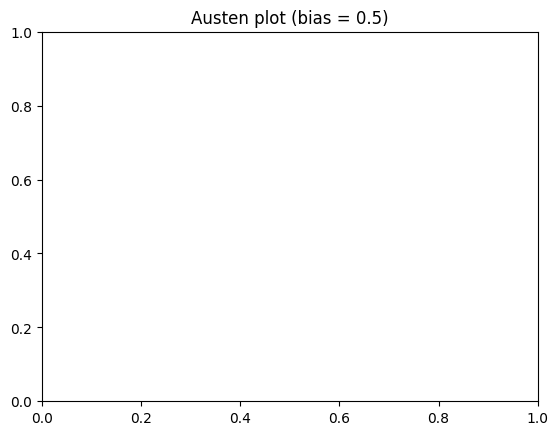

In [ ]:
# AustenPlot用データ保存
input_dir = './example_data'
os.makedirs(input_dir, exist_ok=True)
csv_path = os.path.join(input_dir, 'input_df.csv')
df[['g', 'Q', 't', 'y']].to_csv(csv_path, index=False)

# AustenPlot 実行
bias = 0.5
ap = AustenPlot(input_df_path=csv_path, covariate_dir_path=None)
p, plot_coords, variable_coords = ap.fit(bias=bias)

# プロット表示
p.draw()
plt.title(f"Austen plot (bias = {bias})")
plt.show()

In [ ]:
'''
DML：pywhy ライブラリ参照
https://github.com/py-why
'''
